In [1]:
import pandas as pd
import kaavat
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import os

In [2]:
data = pd.read_csv('data/07-24-data.csv')

In [3]:
data.head()

,Sukupuoli,Ikä,Pituus (cm),Paino (kg),BMI,Vuorokausiaineenvaihdunta,Rasvaprosentti,Rasvamassa (kg),Rasvaton massa (kg),Lihasmassa (kg),Lihasmassan osuus rasvattomasta,6min viitearvo,6min tulos,syke testin lopussa,testisyke/max syke,vo2max,Kuntotaso vo2max (1-7),kyykyt/60s,kuntotaso kyykyt (1-5)
0,mies,18,176.4,74.9,24.1,2295,17.5,13.1,61.8,29.7,0.48,804,936,161,0.80,62,7,19,1
1,mies,18,181.7,97.9,29.7,2712,19.0,18.6,79.3,40.0,0.50,804,917,124,0.61,60,6,39,3
2,mies,21,182.0,110.3,33.3,2900,30.0,33.1,77.2,38.2,0.49,769,703,154,0.77,41,3,25,1
3,mies,24,183.6,134.9,40.0,3300,30.0,40.5,94.4,43.3,0.46,723,614,168,0.86,29,1,18,1
4,mies,27,182.9,82.2,24.6,2392,25.4,20.9,61.3,33.1,0.54,795,777,172,0.89,46,4,11,1


### Testataan lihasvoiman kaavaa

In [50]:
# maksimivoiman kaavat (3 eri tilannetta harjoitustyypin mukaan
# 
def muscle_strength_high_load_orig(x):
    result =  -7.37096740461747e-6 * x**3 - 0.000696853923096596 * x**2 + 0.0406473456690426*x - 0.00324872224317297 
    #result = result +1
    return round(result,2)
    
def muscle_strength_medium_load_orig(x):
    result = -0.000589138923545647* x**2 + 0.027224973648555 * x + 0.000527739726876137
    #result = result +1
    return round(result,2)

def muscle_strength_low_load_orig(x):
    result = -8.11769179414301e-6 * x**3 + 0.000113171645835558 * x**2 + 0.00958601333971586 * x + 0.000254386496098311
    #result = result + 1
    return round(result,2)


![lihasvoima_kuva](images/maksimivoiman_muutokset.png)

In [52]:
# katsotaan mitä kaava sellaisenaan antaa
lihasvoima_low = []
lihasvoima_medium = []
lihasvoima_high = []

for i in range(27):
    arvo = muscle_strength_low_load_orig(i)
    lihasvoima_low.append(arvo)
    arvo2 = muscle_strength_medium_load_orig(i)
    lihasvoima_medium.append(arvo2)
    arvo3 = muscle_strength_high_load_orig(i)
    lihasvoima_high.append(arvo3)
print("Low: ",lihasvoima_low)
print("Medium:", lihasvoima_medium)
print("High:", lihasvoima_high)

Low:  [0.0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.13, 0.14, 0.15, 0.16, 0.16, 0.17, 0.17, 0.18, 0.18, 0.18, 0.18, 0.18, 0.18]
Medium:  [0.0, 0.03, 0.05, 0.08, 0.1, 0.12, 0.14, 0.16, 0.18, 0.2, 0.21, 0.23, 0.24, 0.25, 0.27, 0.28, 0.29, 0.29, 0.3, 0.31, 0.31, 0.31, 0.31, 0.32, 0.31, 0.31, 0.31]
High: [-0.0, 0.04, 0.08, 0.11, 0.15, 0.18, 0.21, 0.24, 0.27, 0.3, 0.33, 0.35, 0.37, 0.39, 0.41, 0.42, 0.44, 0.45, 0.46, 0.47, 0.47, 0.47, 0.48, 0.47, 0.47, 0.46, 0.45]


**Kaava antaa kasvun prosenttimäärän desimaalina väliltä `0.0....0.45`. Toimii sellaisenaan kertoimena muutoksen määrän määrittämiseen. Lisäämällä kertoimeen luvun yksi saadaan suoraan uusi arvo**


### Testataan lihasmassan kaavoja

![lihasmassa_kuva](images/lihasmassan_muutokset.png)

In [18]:
#  lihasmassan kaavat (2 eri tilannetta harjoitustyypin mukaan
def muscle_mass_blue_orig(x: int):
    result =  4.61164958273993E-05 * x**4 - 0.00269325967488724 * x**3 + 0.0452109020879873 * x**2 - 0.0731953018389452 * x + 0.0268766716789236
    #result = result/100 +1
    #result = result/10 +1  # pitääkö saatu prosenttilukema kertoa kymmenellä? vrt. lihasvoiman kaavion y-akseliin
    return round(result,2)
    
def muscle_mass_orange_orig(x: int):
    result = -5.64590881412909E-05 * x**3 - 0.000483816707150222 * x**2 + 0.104065871416303 * x - 0.234270795159786
    #result = result/100 +1
    return round(result,2)


In [48]:
# katsotaan mitä kaava sellaisenaan antaa
lihasmassa_sininen = []
lihasmassa_oranssi = []

for i in range(27):
    arvo = muscle_mass_blue_orig(i)
    lihasmassa_sininen.append(arvo)
    arvo2 = muscle_mass_orange_orig(i)
    lihasmassa_oranssi.append(arvo2)
print("Lihasmassa sininen:", lihasmassa_sininen)
print("lihasmassa oranssi:", lihasmassa_oranssi)

Lihasmassa sininen: [0.03, -0.0, 0.04, 0.15, 0.3, 0.48, 0.69, 0.92, 1.14, 1.37, 1.58, 1.78, 1.96, 2.12, 2.24, 2.35, 2.42, 2.47, 2.49, 2.49, 2.48, 2.45, 2.42, 2.4, 2.38, 2.39, 2.42]
lihasmassa oranssi: [-0.23, -0.13, -0.03, 0.07, 0.17, 0.27, 0.36, 0.45, 0.54, 0.62, 0.7, 0.78, 0.85, 0.91, 0.97, 1.03, 1.08, 1.12, 1.15, 1.18, 1.2, 1.21, 1.22, 1.22, 1.2, 1.18, 1.15]


**Tulokset ei ole suoraan käytettävissä prosenttikertoimina, tuloksena arvoja väliltä `-0.23.......2.42` eli prosenttiluku????? Näin ollen kertomeksi sopiakseen tulos pitäisi jakaa kymmenellä vai sadalla? Sadalla jakaessa prosenttuaalinen muutos esim.6 kuukauden aikana vaikuttaa liian pieneltä?**

### Testataan kestävyyden kaavoja

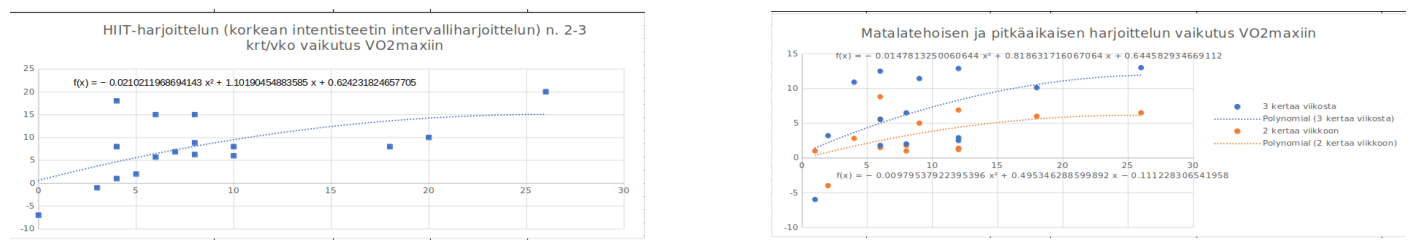

In [38]:
# Määritä kuvien polut
images_folder = 'images'
image1_path = os.path.join(images_folder, 'hiit_vo2max.png')
image2_path = os.path.join(images_folder, 'matalatehoinen_vo2max.png')

# Lataa kuvat
img1 = mpimg.imread(image1_path)
img2 = mpimg.imread(image2_path)

fig, axs = plt.subplots(1, 2, figsize=(18, 12))

axs[0].imshow(img1)
axs[0].axis('off')  # Piilota akselit

axs[1].imshow(img2)
axs[1].axis('off')  # Piilota akselit

plt.show()


In [6]:
def hiit_training(x: int):
    result = -0.021*x**2 + 1.102*x + 0.624
    #result = result/100 +1
    return round(result,2)

def low_impact_three_per_week(x: int):
    result = - 0.0147813250060644* x**2 + 0.818631716067065*x + 0.644582934669111
    #result = result/100 +1
    return round(result,2) 
    
def low_impact_two_per_week(x: int):
    result = -0.00979537922395396*x**2 + 0.495346288599892*x - 0.111228306541958
    #result = result/100 +1
    return round(result,2)

In [7]:
hiit = []
matala2 = []
matala3 = []

for i in range(27):
    arvo1 = hiit_training(i)
    hiit.append(arvo1)
    arvo2 = low_impact_two_per_week(i)
    matala2.append(arvo2)
    arvo3 = low_impact_three_per_week(i)
    matala3.append(arvo3)

print('Hiit:', hiit)
print("Matala2:,", matala2)
print("Matala3:,", matala3)

Hiit: [0.62, 1.71, 2.74, 3.74, 4.7, 5.61, 6.48, 7.31, 8.1, 8.84, 9.54, 10.21, 10.82, 11.4, 11.94, 12.43, 12.88, 13.29, 13.66, 13.98, 14.26, 14.51, 14.7, 14.86, 14.98, 15.05, 15.08]
Matala2:, [-0.11, 0.37, 0.84, 1.29, 1.71, 2.12, 2.51, 2.88, 3.22, 3.55, 3.86, 4.15, 4.42, 4.67, 4.9, 5.12, 5.31, 5.48, 5.63, 5.76, 5.88, 5.97, 6.05, 6.1, 6.13, 6.15, 6.15]
Matala3:, [0.64, 1.45, 2.22, 2.97, 3.68, 4.37, 5.02, 5.65, 6.25, 6.81, 7.35, 7.86, 8.34, 8.79, 9.21, 9.6, 9.96, 10.29, 10.59, 10.86, 11.1, 11.32, 11.5, 11.65, 11.78, 11.87, 11.94]


**Tulokset ei ole suoraan käytettävissä prosenttikertoimina, tuloksena arvoja väliltä `-0.11.....15.08` eli prosenttiluku????? Näin ollen kertomeksi sopiakseen tulos pitäisi jakaa sadalla?**